 # **Que1:**

### **(a) Represent the network in terms of its ‘adjacency matrix’ as well as ‘edge list’.**

In [55]:
# libereraies added
import numpy as np 
import operator
from collections import Counter
import matplotlib.pyplot as plt 

In [56]:
import pandas as pd
data = pd.read_csv('fb-pages-food.edges', sep=',') #data loadede here int the form of data frame: undirected dataset

In [57]:
data.columns=["u","v"]  #two columns name u and v both were nodes
data

,u,v
0,0,58
1,0,132
2,0,603
3,0,398
4,0,555
...,...,...
2096,597,611
2097,601,603
2098,601,616
2099,603,616


total number of nodes: 620

count total number of nodes in graph

In [58]:
n=set(data['u']).union(set(data['v']))
print("total number of nodes: ",len(n))

total number of nodes:  620


Adjancecy matix of  size n by n with 0 initlaization.

In [59]:
# https://stackoverflow.com/questions/2397141/how-to-initialize-a-two-dimensional-array-in-python
adjancency_matrix= [[0 for i in range(len(n))] for j in range(len(n))]    #adjancecey matrix

fill up the matrix if there is an edge between node u and node v  then put 1 in matrix block between matrix[u][v] else assign 0 in them

In [60]:
for i in range(0,len(data)):   #loop till o to total edges in the graph and fill the matrix
  if(data['u'][i]!=data['v'][i]):   # check for 2 nodes should't be same else self loop will occure no require for that
    adjancency_matrix[data['u'][i]][data['v'][i]]=1     #assign 1 is there us edge 
    adjancency_matrix[data['v'][i]][data['u'][i]]=1     # else 0


Adjancecy matrix of graph

In [61]:
import pprint
pp = pprint.PrettyPrinter(indent=10)
pp.pprint(np.array(adjancency_matrix))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])


Create an edge list for all the nodes of the graph:

In [62]:
edge_list={}   # dictionary for edge list
for i in range(len(adjancency_matrix)): # initialise empty list for all the nodes 
  edge_list[i]=[]

In [63]:
total_edges=0    #total edges are 0 intitia;;y
degree_of_nodes={}   # dictionary for degree of each node where key is node and value is degree of particular node. 
for i in range(len(adjancency_matrix)):  # loop for rows
  for j in range(len(adjancency_matrix[i])): #loop for columns
    if adjancency_matrix[i][j]==1:      #check is there is an edge in graph
      edge_list[i].append(j)                # then append it on the list of particular node
  degree_of_nodes[i]=len(edge_list[i])       #here total number of nodes present in the list of nodes of edge list i.e.total neighbors is the degree of a particular node.
  total_edges+=len(edge_list[i])             #here counting of total edges
  print(i,"------",edge_list[i])

0 ------ [58, 132, 398, 555, 603]
1 ------ [265, 611]
2 ------ [182, 265, 345]
3 ------ [40, 65, 185, 228, 299, 352, 377, 450, 484, 608]
4 ------ [254, 265, 287, 336]
5 ------ [503]
6 ------ [163, 429, 478, 486, 518]
7 ------ [35, 265, 293, 305, 339, 444, 583]
8 ------ [73, 98, 278, 369, 434]
9 ------ [15, 23, 56, 67, 89, 90, 107, 131, 189, 206, 229, 248, 249, 254, 265, 288, 289, 317, 340, 351, 434, 446, 465, 498, 550, 570, 593, 611]
10 ------ [258, 393]
11 ------ [174, 212, 259, 264, 380, 485]
12 ------ [310, 548, 618]
13 ------ [352]
14 ------ [264, 326]
15 ------ [9, 43, 56, 67, 70, 265, 340, 432, 454, 505]
16 ------ [75, 117, 119, 237, 274, 334, 374, 400, 466, 516, 545, 613]
17 ------ [65, 185, 299, 450, 608]
18 ------ [265]
19 ------ [572]
20 ------ [160, 238, 242, 324, 355, 481]
21 ------ [329, 334, 441, 516]
22 ------ [104, 187, 270, 420]
23 ------ [9, 54, 58, 67, 128, 157, 182, 227, 257, 277, 288, 340, 343, 434]
24 ------ [230, 306, 501, 502, 547, 591]
25 ------ [363]
26 ------

### **(c)Comment on the ‘sparseness’ of the network.**

As there is no self loops the maximum number possile eges present in the graph is n(n-1)/2 where n is number of nodes in the graph here n*n(n-1)/2 is 191890 which is too much coampre to current present edges that is 2090 . So graph is highly sparse because of less number of edges present. here.

In [64]:
print("overall there are n*(n-1)/2 edges in the graph where value of n(nodes) is : ",len(n))
a=int((len(n)*(len(n)-1))/2)
print("therefor n*(n-1)/2 vlaue is : ",a)
b=int(total_edges/2)
print("Actual number of edges with ",len(n)," nodes are : ",b)
print("difference between : maximum edges - actual edges : ",(a-b))
print("therefor the graph is too sparse")

overall there are n*(n-1)/2 edges in the graph where value of n(nodes) is :  620
therefor n*(n-1)/2 vlaue is :  191890
Actual number of edges with  620  nodes are :  2090
difference between : maximum edges - actual edges :  189800
therefor the graph is too sparse


### **(d) Compute its average degree < k >.**

In [65]:
print("Degree of each nodes are : ")
pp.pprint(degree_of_nodes)
val=0
for key,value in degree_of_nodes.items():   #here count of frquency of degrees in degree_of_nodes dictionary where key is degree and values if frquency
  val+=value
print("average degree: ",val/len(n))   #here avergae dgeree is taken out by formula :total value sum of degrees/total nodes

Degree of each nodes are : 
{         0: 5,
          1: 2,
          2: 3,
          3: 10,
          4: 4,
          5: 1,
          6: 5,
          7: 7,
          8: 5,
          9: 28,
          10: 2,
          11: 6,
          12: 3,
          13: 1,
          14: 2,
          15: 10,
          16: 12,
          17: 5,
          18: 1,
          19: 1,
          20: 6,
          21: 4,
          22: 4,
          23: 14,
          24: 6,
          25: 1,
          26: 1,
          27: 1,
          28: 3,
          29: 1,
          30: 1,
          31: 25,
          32: 8,
          33: 2,
          34: 6,
          35: 22,
          36: 1,
          37: 1,
          38: 1,
          39: 6,
          40: 7,
          41: 13,
          42: 1,
          43: 12,
          44: 1,
          45: 6,
          46: 7,
          47: 3,
          48: 5,
          49: 6,
          50: 14,
          51: 1,
          52: 2,
          53: 1,
          54: 5,
          55: 8,
          56: 47,
  

### **(e) Plot its ‘scaled degree distribution’, pk × k.**

In [66]:
degree_frequncy={} # here frquncy count of each degree in degree_frequncy
for key,value in degree_of_nodes.items():
  if value not in degree_frequncy.keys():   #if particular frquncy is not arrived then put it there 
    degree_frequncy[value]=0    
    degree_frequncy[value]+=1
  else:
    degree_frequncy[value]+=1     ##here is particular degree is repeating then keep it counting 
  

In [67]:
kmax=0
cmax=0
for key,value in degree_frequncy.items(): #for finding maximum degree kmax in the graph
  if cmax< value:
    kmax=key
    cmax=value

In [68]:
keyMax = degree_frequncy[max(degree_frequncy.items(), key = operator.itemgetter(1))[0] ]

In [69]:
degree_frequncy = dict(sorted(degree_frequncy.items(), key=lambda x: x[0]))

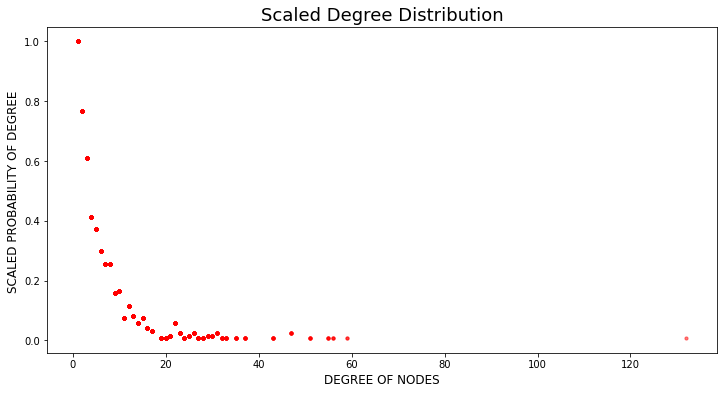

In [70]:
import matplotlib.pyplot as plt
import numpy as np
fg, ax = plt.subplots(figsize =(12, 6)) 
x_axis=[]
y_axis=[]
kmax=max(list(degree_frequncy.keys()))
for key,value in  degree_frequncy.items():  
  x_axis.append(key)
  y_axis.append((value/keyMax))
  ax.scatter(x_axis,y_axis,s=np.pi*3.2,c=("red"), alpha=0.5)
     
plt.xlabel("DEGREE OF NODES", fontsize=12) 
plt.ylabel("SCALED PROBABILITY OF DEGREE ", fontsize=12) 
plt.title("Scaled Degree Distribution",fontsize=18) 
plt.show() 

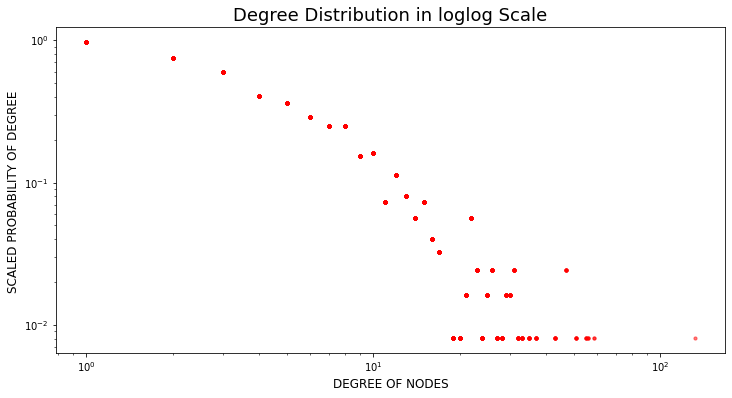

In [71]:
#Loglog Scaled Degree Distribution

import matplotlib.pyplot as plt
import numpy as np
fg, ax = plt.subplots(figsize =(12, 6)) 
x_axis=[]
y_axis=[]
for key,value in  degree_frequncy.items():  
  x_axis.append(key)
  y_axis.append((value/len(n))/0.2)
  ax.scatter(x_axis,y_axis,s=np.pi*3.2,c=("red"), alpha=0.5)
  plt.yscale('log')
  plt.xscale('log')
    
plt.xlabel("DEGREE OF NODES", fontsize=12) 
plt.ylabel("SCALED PROBABILITY OF DEGREE ", fontsize=12) 
plt.title("Degree Distribution in loglog Scale",fontsize=18) 
plt.show() 

### **(f) Compute its Average Path Length (Implement Breadth First Search Algorithm), Diameter and Average Clustering Coefficient.**

In [72]:
distance={}  #distance dictionary for storing of distance form src node(i) to destination node(j) 
for i in range(0,len(adjancency_matrix)):  #initialization of distance matrix by 0 for all nodes
  distance[i]={}
  for j in range(0,len(adjancency_matrix[0])):
    distance[i][j]=0

Implement Breadth First Search Algorithm

In [73]:
# edge_list
sum=0   
for i in range(0,len(adjancency_matrix)):  #loop for rows
  for j in range(i+1,len(adjancency_matrix)): #loop for columns
    if i!=j:  #if nodes are not same then start the algorithm
      temp={}  #temporary dictionary for assigneding distance of all the neighbor nodes of source node
      queue=[] #queues act as a visited list for node , here adjancent node inserted in the queueu
      if len(edge_list[i])!=0:    #if adjancent nodes of source node are present then make every adjacent nodes distance to 1 intially
        for x in edge_list[i]:
          temp[x]=1
          queue.append(x)
          
      while(len(queue)!=0):    #run this loop till we got the destination and till loop is not not empty.
        x=queue[0]                #take out node and assign to x
        queue.remove(queue[0])     #remove 1st node from the queue
        if x==j:                    #removed node is destination then stop the algorihtm and run for next destination 
          distance[i][j]=temp[x]    #assign the distance of src i to j from temp x .
          sum+=temp[x]
          break                       #then break
        else:
          for l in edge_list[x]:     #else take out all the adjancent neighbors and add into the queue 
            if l not in temp.keys():
              temp[l]=temp[x]+1                      #along with intialse the distance of new node as per distance of remove node from source node+1
              queue.append(l)                # then append in queue
              

Averegae path length

In [74]:
print("Average path length is: sum of distances/nC2 :",((2*sum)/(len(n)*(len(n)-1))))

Average path length is: sum of distances/nC2 : 5.092605138360519


diameter:

In [75]:
diameter=0 #initially diameter is equal to 0
for i in distance.keys():    #take the maximum distance as a diameter if the graph
  diameter=max(diameter,max(distance[i].values()))


In [76]:
print("diameter of the graph is :",diameter)

diameter of the graph is : 17


Average cluster coefficient:

cluster coefficient formula= Li /nC2



where Li is number of edges between the adjancent if node i and n is the total adjanct nodes of node i.

In [77]:
cluster_coefficient={}  #intitilialise the cluster coeffienct of nodes
for i in range(0,len(adjancency_matrix)):
  li=0
  for j in range(0,len(edge_list[i])):  #loop for checking if there exist and edge between adjanct nodes of the source node i
    for k in range(j+1, len(edge_list[i])):
      if adjancency_matrix[edge_list[i][j]][edge_list[i][k]]==1 :  # if node exist the incerment Li
        li+=1     
  if li!=0:
    cluster_coefficient[i]=(2*li)/(len(edge_list[i])*(len(edge_list[i])-1))     #here calculate cluster coeffcient by particular formula

In [78]:
temp_sum=0
for i in list(cluster_coefficient.values()):   #total sum for cluster coefficent of each nodes
  temp_sum+=i

In [79]:
print("Average cluster coefficent: ",temp_sum/len(n))  #average cluster coefficent is total sum of each cluster coefficent / total numbe rof nodes


Average cluster coefficent:  0.33078404030069036


In [80]:
cluster_coefficient #cluster coeffcient of each nodes.

{0: 0.2,
 1: 1.0,
 2: 1.0,
 3: 0.2222222222222222,
 4: 0.16666666666666666,
 6: 0.5,
 7: 0.23809523809523808,
 8: 0.1,
 9: 0.3439153439153439,
 11: 0.9333333333333333,
 15: 0.5777777777777777,
 16: 0.8939393939393939,
 17: 0.4,
 21: 0.3333333333333333,
 22: 0.6666666666666666,
 23: 0.16483516483516483,
 24: 0.6666666666666666,
 28: 1.0,
 31: 0.12666666666666668,
 32: 0.2857142857142857,
 34: 0.3333333333333333,
 35: 0.2987012987012987,
 39: 0.2,
 40: 0.14285714285714285,
 41: 0.15384615384615385,
 43: 0.3181818181818182,
 45: 0.4666666666666667,
 46: 0.38095238095238093,
 48: 0.9,
 50: 0.14285714285714285,
 52: 1.0,
 54: 0.2,
 55: 0.8571428571428571,
 56: 0.2506938020351526,
 58: 0.34285714285714286,
 59: 1.0,
 60: 0.6666666666666666,
 62: 0.2909090909090909,
 63: 0.37777777777777777,
 65: 0.4642857142857143,
 67: 0.18181818181818182,
 68: 0.6444444444444445,
 69: 0.6666666666666666,
 70: 0.18038852913968548,
 72: 0.3333333333333333,
 73: 1.0,
 75: 1.0,
 78: 0.6944444444444444,
 79: 0.